In [127]:
import pandas as pd

# 1) Load
utica = pd.read_excel("../Python_data/UticaTackleData_2025-08-23.xlsx")
moville = pd.read_excel("../Python_data/MorrisvilleTackleData_2025-08-30.xlsx")
norwich = pd.read_excel('../Python_data/NorwichTackleDataV2_2025-09-11.xlsx')
sjf = pd.read_excel('../Python_data/SJFTackleDataV2_2025-09-17.xlsx')
alfred = pd.read_excel('../Python_data/AlfredTackleDataV2_2025-09-20.xlsx')
union = pd.read_excel('../Python_data/UnionTackleDataV2_2025-09-27.xlsx')
hilbert = pd.read_excel('../Python_data/HilbertTackleDataV2_2025-10-04.xlsx')
ithaca = pd.read_excel('../Python_data/IthacaTackleDataV2_2025-10-11.xlsx')
hobart = pd.read_excel('../Python_data/HobartTackleDataV2_2025-10-25.xlsx')
rpi = pd.read_excel('../Python_data/RPITackleDataV2_2025-11-01.xlsx')
buffstate = pd.read_excel('../Python_data/BuffStateTackleDataV2_2025-11-08.xlsx')
rochester = pd.read_excel('../Python_data/RochesterTackleDataV2_2025-11-15.xlsx')
# 2) Tag game and date
utica["GAME"],   utica["GAME_DATE"], utica['WEEK']   = "UT", "2025-08-23", "-1"
moville["GAME"], moville["GAME_DATE"], moville['WEEK'] = "MO", "2025-08-30", '0'
norwich["GAME"], norwich["GAME_DATE"], norwich['WEEK'] = "NR", "2025-09-05", '1'
sjf["GAME"], sjf["GAME_DATE"], sjf['WEEK'] = "SJF", "2025-09-13", '2'
alfred["GAME"], alfred["GAME_DATE"], alfred['WEEK'] = "ALF", "2025-09-20", '3'
union["GAME"], union["GAME_DATE"], union['WEEK'] = "UC", "2025-09-27", '4'
hilbert["GAME"], hilbert["GAME_DATE"], hilbert['WEEK'] = "HC", "2025-10-04", '5'
ithaca["GAME"], ithaca["GAME_DATE"], ithaca['WEEK'] = "IC", "2025-10-11", '6'
hobart["GAME"], hobart["GAME_DATE"], hobart['WEEK'] = "HOB", "2025-10-25", '7'
rpi["GAME"], rpi["GAME_DATE"], rpi['WEEK'] = "RPI", "2025-11-01", '8'
buffstate["GAME"], buffstate["GAME_DATE"], buffstate['WEEK'] = "BSU", "2025-11-08", '9'
rochester["GAME"], rochester["GAME_DATE"], rochester['WEEK'] = "UOR", "2025-11-15", '10'


# 3) Combine
tackle = pd.concat([utica, moville, norwich, sjf, alfred, union, hilbert, ithaca, hobart, rpi, buffstate, rochester], ignore_index=True)

tech_cols = ["TRACK", "PREPARE", "CONNECT", "ACCELERATE", "FINISH"]
tackle["TECH_SCORE"] = tackle[tech_cols].sum(axis=1)
tackle_clean = tackle.loc[(tackle["PLAY RESULT"] != "PENALTY") & (tackle["LEVEL"] != 0)]
tackle = tackle_clean
tackle

,PLAY #,ODK,DN,DIST,YARD LN,HASH,GN/LS,PERSONNEL,PLAY TYPE,PLAY RESULT,...,CONNECT,ACCELERATE,FINISH,YAFC,ASSISTED,FIELD_TYPE,GAME,GAME_DATE,WEEK,TECH_SCORE
0,3,D,2,4,-46,L,22,10,Pass,COMPLETE,...,1,0,1,2,NO,OPEN,UT,2025-08-23,-1,7
1,11,D,2,1,-49,R,12,10,Pass,COMPLETE,...,1,1,1,0,NO,OPEN,UT,2025-08-23,-1,9
2,14,D,3,16,45,R,41,10,Pass,COMPLETE,...,1,0,1,1,NO,SIDELINE,UT,2025-08-23,-1,7
3,2,D,2,8,18,M,1,11,Pass,COMPLETE,...,1,1,4,0,NO,OPEN,UT,2025-08-23,-1,9
4,5,D,1,10,20,R,5,11,Pass,COMPLETE,...,0,3,0,2,NO,SIDELINE,UT,2025-08-23,-1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,141,D,3,8,-30,L,13,11,Pass,COMPLETE,...,1,1,1,2,YES,OPEN,UOR,2025-11-15,10,5
553,143,D,2,10,-43,R,17,11,Pass,COMPLETE,...,0,0,0,7,NO,OPEN,UOR,2025-11-15,10,3
554,144,D,1,10,40,L,5,11,Pass,COMPLETE,...,2,2,2,0,NO,SIDELINE,UOR,2025-11-15,10,13
555,145,D,2,5,35,L,11,11,Pass,COMPLETE,...,2,1,2,1,NO,OPEN,UOR,2025-11-15,10,12


In [264]:
tackle.groupby("TACKLE ENTRY").agg(Count=("TACKLE ENTRY", "size"), Mean_YAFC=("YAFC", "mean"), Mean_TECH_SCORE=("TECH_SCORE", "mean"))


,Count,Mean_YAFC,Mean_TECH_SCORE
TACKLE ENTRY,,,
FRONT,181,2.928177,9.176796
REAR,78,3.782051,9.282051
SIDE,283,4.438163,7.904594


In [262]:
out = tackle.groupby(["LEVEL", "MAKE/MISS"]).agg(
    Count=("MAKE/MISS", "size"),
    Mean_YAFC=("YAFC", "mean")
)
out["Proportion"] = out["Count"] / out.groupby(level=0)["Count"].transform("sum")
out[["Count", "Proportion", "Mean_YAFC"]]


Count  Proportion  Mean_YAFC
LEVEL MAKE/MISS                              
1     MAKE          34    0.618182   2.000000
      MISS          21    0.381818   9.142857
2     MAKE         104    0.717241   1.221154
      MISS          41    0.282759   5.829268
3     MAKE         196    0.573099   1.673469
      MISS         146    0.426901   7.719178

In [128]:
#Level 3 Tackle Anlysis
float((tackle["LEVEL"] == 3).sum())


342.0

In [129]:
tackle['LEVEL'].value_counts().reset_index()

,LEVEL,count
0,3,342
1,2,145
2,1,55


In [130]:
float((tackle["LEVEL"] == 1).sum())


55.0

In [192]:

float(tackle.loc[tackle['GAME'].isin(['SJF', 'NR', 'ALF', 'UC', 'HC', 'IC', 'HOB','RPI', 'BSU', 'UOR']), 'YAFC'].sum())


1853.0

In [193]:
float(tackle.loc[tackle['WEEK'].isin(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']), 'YAFC'].sum())


1853.0

In [ ]:
float(tackle['YAFC'].mean()) 

3.839483394833948

In [194]:
tackle.groupby('LEVEL')['YAFC'].sum()


LEVEL
1     260
2     366
3    1455
Name: YAFC, dtype: int64

In [134]:
tackle.groupby('WEEK')['YAFC'].sum()

WEEK
-1     58
0     170
1     113
10    146
2     236
3     175
4     224
5     204
6     176
7     303
8     165
9     111
Name: YAFC, dtype: int64

In [199]:
counts_entry = (
    tackle_clean["TACKLE ENTRY"]
    .value_counts(dropna=False)
    .reset_index()
)
counts_entry.columns = ["TACKLE ENTRY", "Count"]
counts_entry

,TACKLE ENTRY,Count
0,SIDE,283
1,FRONT,181
2,REAR,78


In [201]:
tackle.groupby('TACKLE ENTRY')['YAFC'].mean()


TACKLE ENTRY
FRONT    2.928177
REAR     3.782051
SIDE     4.438163
Name: YAFC, dtype: float64

In [205]:
tackle.groupby('TACKLE ENTRY')['TECH_SCORE'].mean()


TACKLE ENTRY
FRONT    9.176796
REAR     9.282051
SIDE     7.904594
Name: TECH_SCORE, dtype: float64

In [203]:
tackle.groupby('TACKLE ENTRY')['MAKE/MISS'].value_counts(normalize = True)


TACKLE ENTRY  MAKE/MISS
FRONT         MAKE         0.629834
              MISS         0.370166
REAR          MAKE         0.756410
              MISS         0.243590
SIDE          MAKE         0.568905
              MISS         0.431095
Name: proportion, dtype: float64

In [204]:
tackle.groupby('TACKLE ENTRY')['LEVEL'].value_counts(normalize = True)


TACKLE ENTRY  LEVEL
FRONT         3        0.624309
              2        0.292818
              1        0.082873
REAR          3        0.705128
              2        0.192308
              1        0.102564
SIDE          3        0.614841
              2        0.272085
              1        0.113074
Name: proportion, dtype: float64

In [135]:
tackle.groupby('WEEK')['YAFC'].mean()


WEEK
-1    2.230769
0     4.358974
1     2.627907
10    3.476190
2     4.627451
3     3.365385
4     4.765957
5     3.777778
6     3.450980
7     5.716981
8     3.586957
9     2.921053
Name: YAFC, dtype: float64

In [136]:
tackle.groupby('ENGAGED')["MAKE/MISS"].value_counts(normalize=True)


ENGAGED  MAKE/MISS
NO       MAKE         0.662371
         MISS         0.337629
YES      MAKE         0.500000
         MISS         0.500000
Name: proportion, dtype: float64

In [137]:
tackle.groupby(['LEVEL'])["MAKE/MISS"].value_counts(normalize=True)


LEVEL  MAKE/MISS
1      MAKE         0.618182
       MISS         0.381818
2      MAKE         0.717241
       MISS         0.282759
3      MAKE         0.573099
       MISS         0.426901
Name: proportion, dtype: float64

In [138]:
tackle.groupby(['ENGAGED', 'LEVEL'])["MAKE/MISS"].value_counts(normalize=True)

ENGAGED  LEVEL  MAKE/MISS
NO       1      MAKE         0.681818
                MISS         0.318182
         2      MAKE         0.760684
                MISS         0.239316
         3      MAKE         0.607930
                MISS         0.392070
YES      1      MISS         0.636364
                MAKE         0.363636
         2      MAKE         0.535714
                MISS         0.464286
         3      MAKE         0.504348
                MISS         0.495652
Name: proportion, dtype: float64

In [139]:
tackle.groupby(['WEEK'])["MAKE/MISS"].value_counts(normalize=True)


WEEK  MAKE/MISS
-1    MAKE         0.769231
      MISS         0.230769
0     MAKE         0.538462
      MISS         0.461538
1     MAKE         0.790698
      MISS         0.209302
10    MAKE         0.642857
      MISS         0.357143
2     MAKE         0.529412
      MISS         0.470588
3     MAKE         0.634615
      MISS         0.365385
4     MAKE         0.553191
      MISS         0.446809
5     MAKE         0.611111
      MISS         0.388889
6     MAKE         0.686275
      MISS         0.313725
7     MAKE         0.566038
      MISS         0.433962
8     MAKE         0.521739
      MISS         0.478261
9     MAKE         0.631579
      MISS         0.368421
Name: proportion, dtype: float64

In [140]:
# Make/Miss Proportions by level
tackle.groupby(['WEEK', 'LEVEL'])["MAKE/MISS"].value_counts(normalize=True)

WEEK  LEVEL  MAKE/MISS
-1    1      MAKE         1.000000
      2      MAKE         0.833333
             MISS         0.166667
      3      MAKE         0.642857
             MISS         0.357143
                            ...   
9     1      MAKE         0.250000
      2      MAKE         0.777778
             MISS         0.222222
      3      MAKE         0.640000
             MISS         0.360000
Name: proportion, Length: 68, dtype: float64

In [195]:
tackle["MAKE/MISS"].value_counts(normalize=True)

MAKE/MISS
MAKE    0.616236
MISS    0.383764
Name: proportion, dtype: float64

In [197]:
tackle.groupby('MAKE/MISS')['MAKE/MISS'].agg('count')


MAKE/MISS
MAKE    334
MISS    208
Name: MAKE/MISS, dtype: int64

In [256]:
tackle.groupby("LEVEL")["YAFC"].agg(["min", "max", "mean"])

,min,max,mean
LEVEL,,,
1,0,49,4.727273
2,-1,42,2.524138
3,-1,50,4.254386


In [257]:
tackle.groupby(["LEVEL", "MAKE/MISS"])["YAFC"].mean()

LEVEL  MAKE/MISS
1      MAKE         2.000000
       MISS         9.142857
2      MAKE         1.221154
       MISS         5.829268
3      MAKE         1.673469
       MISS         7.719178
Name: YAFC, dtype: float64

In [144]:
tackle.groupby(["MAKE/MISS"])["YAFC"].mean()


MAKE/MISS
MAKE    1.565868
MISS    7.490385
Name: YAFC, dtype: float64

In [145]:
tackle.groupby('LEVEL')[["TRACK", "PREPARE", "CONNECT", "ACCELERATE", "FINISH", 'TECH_SCORE']].mean()

,TRACK,PREPARE,CONNECT,ACCELERATE,FINISH,TECH_SCORE
LEVEL,,,,,,
1,2.654545,2.200000,1.436364,0.927273,1.345455,8.563636
2,3.034483,2.393103,1.889655,1.331034,1.820690,10.468966
3,2.353801,1.511696,1.280702,1.163743,1.388889,7.698830


In [146]:
tackle.groupby("MAKE/MISS")[["TRACK", "PREPARE", "CONNECT", "ACCELERATE", "FINISH"]].mean()

,TRACK,PREPARE,CONNECT,ACCELERATE,FINISH
MAKE/MISS,,,,,
MAKE,3.014970,2.413174,2.251497,1.835329,2.434132
MISS,1.846154,0.860577,0.187500,0.139423,0.000000


In [147]:
tackle.groupby('TACKLER')[["TRACK", "PREPARE", "CONNECT", "ACCELERATE", "FINISH"]].agg('mean')


,TRACK,PREPARE,CONNECT,ACCELERATE,FINISH
TACKLER,,,,,
3,2.636364,2.424242,1.969697,1.242424,1.909091
8,3.600000,2.200000,1.600000,1.200000,1.600000
11,1.666667,1.333333,0.500000,0.166667,0.333333
15,2.611940,1.910448,1.492537,1.313433,1.507463
17,3.000000,3.000000,3.000000,2.000000,3.000000
20,3.028571,1.914286,1.342857,1.114286,1.485714
21,2.593750,1.875000,1.562500,1.468750,1.843750
22,3.000000,1.000000,0.500000,1.000000,1.500000
23,2.000000,2.500000,2.000000,2.000000,2.500000


In [207]:
tackle.groupby('TACKLER')['TACKLER'].agg('count')


TACKLER
3     33
8      5
11     6
15    67
17     1
20    35
21    32
22     2
23     2
24     9
25     6
27    17
28    26
29     7
30     6
31    42
32     2
33     1
34     1
35    28
36     6
37     8
39     3
41     4
42     2
43     4
47    24
48    29
49     6
50     2
51     1
52    44
53     2
54     2
55    11
56    12
58     1
59     1
74     2
75    20
91     3
93     3
94    14
95     1
97     9
Name: TACKLER, dtype: int64

In [149]:
tackle.groupby('TACKLER')['TECH_SCORE'].agg('mean')

TACKLER
3     10.181818
8     10.200000
11     4.000000
15     8.835821
17    14.000000
20     8.885714
21     9.343750
22     7.000000
23    11.000000
24     6.777778
25     7.000000
27     8.529412
28     9.192308
29     7.428571
30     3.666667
31    10.000000
32     6.000000
33     3.000000
34    10.000000
35     5.428571
36    12.333333
37     7.250000
39     3.666667
41    10.750000
42     0.500000
43     6.250000
47     9.666667
48     9.448276
49     7.500000
50    14.000000
51     2.000000
52    10.272727
53     6.000000
54    10.500000
55     6.363636
56     3.750000
58    10.000000
59     3.000000
74     9.000000
75     6.350000
91     9.666667
93     6.000000
94     9.357143
95     4.000000
97     7.555556
Name: TECH_SCORE, dtype: float64

In [213]:
tackle.groupby("TACKLER").filter(lambda x: len(x) > 9).groupby("TACKLER")["TECH_SCORE"].mean().sort_values(ascending=False)

TACKLER
52    10.272727
3     10.181818
31    10.000000
47     9.666667
48     9.448276
94     9.357143
21     9.343750
28     9.192308
20     8.885714
15     8.835821
27     8.529412
55     6.363636
75     6.350000
35     5.428571
56     3.750000
Name: TECH_SCORE, dtype: float64

In [223]:
tackle.groupby("TACKLER").filter(lambda x: len(x) >= 10).groupby("TACKLER")["YAFC"].mean().sort_values(ascending=True)

TACKLER
94    2.285714
48    2.620690
21    2.812500
52    2.954545
55    3.363636
3     3.393939
20    3.457143
47    3.791667
15    3.880597
31    3.880952
27    3.941176
28    4.346154
75    5.250000
35    5.571429
56    5.916667
Name: YAFC, dtype: float64

In [150]:
tackle.groupby(['DEF. PLAY CALL', 'TACKLER'])['TACKLER'].agg('count')

DEF. PLAY CALL        TACKLER
(MAYDAY) OVER 6 LOCK  3          2
                      28         1
                      41         1
ALI                   11         1
                      35         1
                                ..
WATSON SHOW PEYTON    27         1
                      52         2
WHISKEY RAYS          15         1
                      48         1
WIZARD                94         1
Name: TACKLER, Length: 379, dtype: int64

In [151]:
tackle.groupby('TACKLER')['MAKE/MISS'].value_counts(normalize=True)


TACKLER  MAKE/MISS
3        MAKE         0.666667
         MISS         0.333333
8        MAKE         1.000000
11       MISS         0.666667
         MAKE         0.333333
                        ...   
94       MAKE         0.857143
         MISS         0.142857
95       MISS         1.000000
97       MAKE         0.777778
         MISS         0.222222
Name: proportion, Length: 76, dtype: float64

In [216]:
tackle.groupby("TACKLER").filter(lambda x: len(x) >= 9).groupby("TACKLER")["MAKE/MISS"].apply(
    lambda s: (s.astype(str).str.upper() == "MAKE").mean()
).sort_values(ascending=False)

TACKLER
94    0.857143
97    0.777778
21    0.750000
47    0.750000
28    0.692308
52    0.681818
3     0.666667
24    0.666667
48    0.655172
31    0.642857
20    0.571429
15    0.567164
27    0.529412
75    0.500000
35    0.500000
55    0.363636
56    0.250000
Name: MAKE/MISS, dtype: float64

In [152]:
specific_tacklers = [3, 15, 52, 47, 24, 28, 31, 36, 21, 20, 94, 75, 91, 35, 49, 48, 56, 25, 29, 27, 37]

make_miss_summary = (
    tackle.loc[tackle['TACKLER'].isin(specific_tacklers)]
    .groupby('TACKLER')['MAKE/MISS']
    .value_counts(normalize=True)
    .rename('PERCENT')
    .reset_index()
)
make_miss_summary

,TACKLER,MAKE/MISS,PERCENT
0,3,MAKE,0.666667
1,3,MISS,0.333333
2,15,MAKE,0.567164
3,15,MISS,0.432836
4,20,MAKE,0.571429
5,20,MISS,0.428571
6,21,MAKE,0.750000
7,21,MISS,0.250000
8,24,MAKE,0.666667
9,24,MISS,0.333333


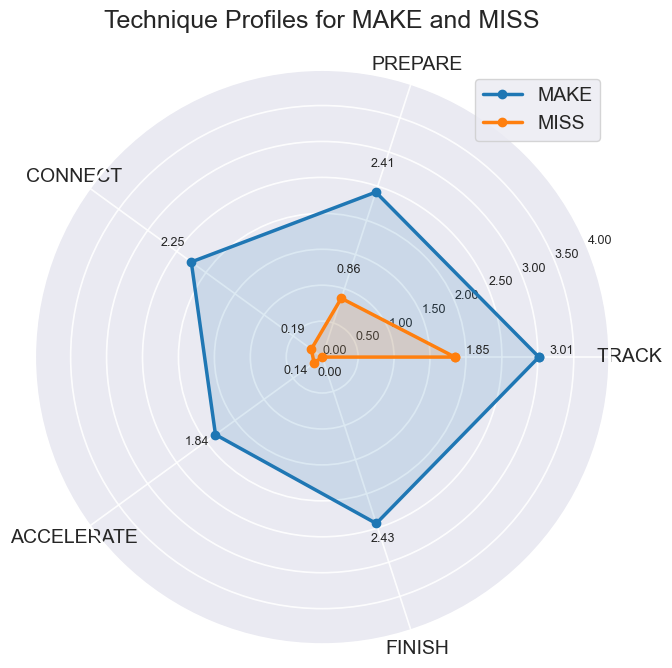

In [191]:
import numpy as np
import matplotlib.pyplot as plt

# Radar chart of technique profiles for MAKE and MISS
tech_cols = ["TRACK","PREPARE","CONNECT","ACCELERATE","FINISH"]
tech_by_outcome = (
    tackle.groupby("MAKE/MISS")[tech_cols]
    .mean()
    .reindex(["MAKE","MISS"])
)

labels = tech_by_outcome.columns.tolist()
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
angles = np.concatenate([angles, [angles[0]]])

vals_make_raw = tech_by_outcome.loc["MAKE", labels].values
vals_miss_raw = tech_by_outcome.loc["MISS", labels].values
vals_make = np.concatenate([vals_make_raw, [vals_make_raw[0]]])
vals_miss = np.concatenate([vals_miss_raw, [vals_miss_raw[0]]])

fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Technique Profiles for MAKE and MISS", pad=30)

ax.set_rorigin(0)
ax.set_rlim(0, 4.0)

# Smaller radial tick increments (was 0.5, now 0.25)
rticks = np.arange(0, 4.01, 0.5)
ax.set_yticks(rticks)
ax.set_yticklabels([f"{r:.2f}" for r in rticks], fontsize=9)

# Make the radar outline/grid brighter and easier to see
ax.spines["polar"].set_linewidth(2.0)
ax.spines["polar"].set_alpha(1.0)
ax.grid(True, linewidth=1.2, alpha=0.9)

# Slightly thicker lines so the shapes pop
ax.plot(angles, vals_make, marker="o", linewidth=2.5, label="MAKE")
ax.fill(angles, vals_make, alpha=0.15)

ax.plot(angles, vals_miss, marker="o", linewidth=2.5, label="MISS")
ax.fill(angles, vals_miss, alpha=0.15)

offset = 0.32
for ang, vm, vn in zip(angles[:-1], vals_make_raw, vals_miss_raw):
    y_make = min(vm + offset, 4.0)
    y_miss = min(vn + offset, 4.0)

    ax.annotate(f"{vm:.2f}", xy=(ang, vm), xytext=(ang, y_make),
                ha="center", va="bottom", fontsize=9)
    ax.annotate(f"{vn:.2f}", xy=(ang, vn), xytext=(ang, y_miss),
                ha="center", va="bottom", fontsize=9)

ax.legend(loc="upper right")
plt.tight_layout()
plt.show()


In [155]:
# make some plots that are easy for the coaches to understand, what we have noticed so far
# consider the make/miss or yafc what is important that lead to a made tackle (Does the accelerate improvement make us better) see what kind of regression models it can fit in
# model the players deviation from the team average: who is playing optimally

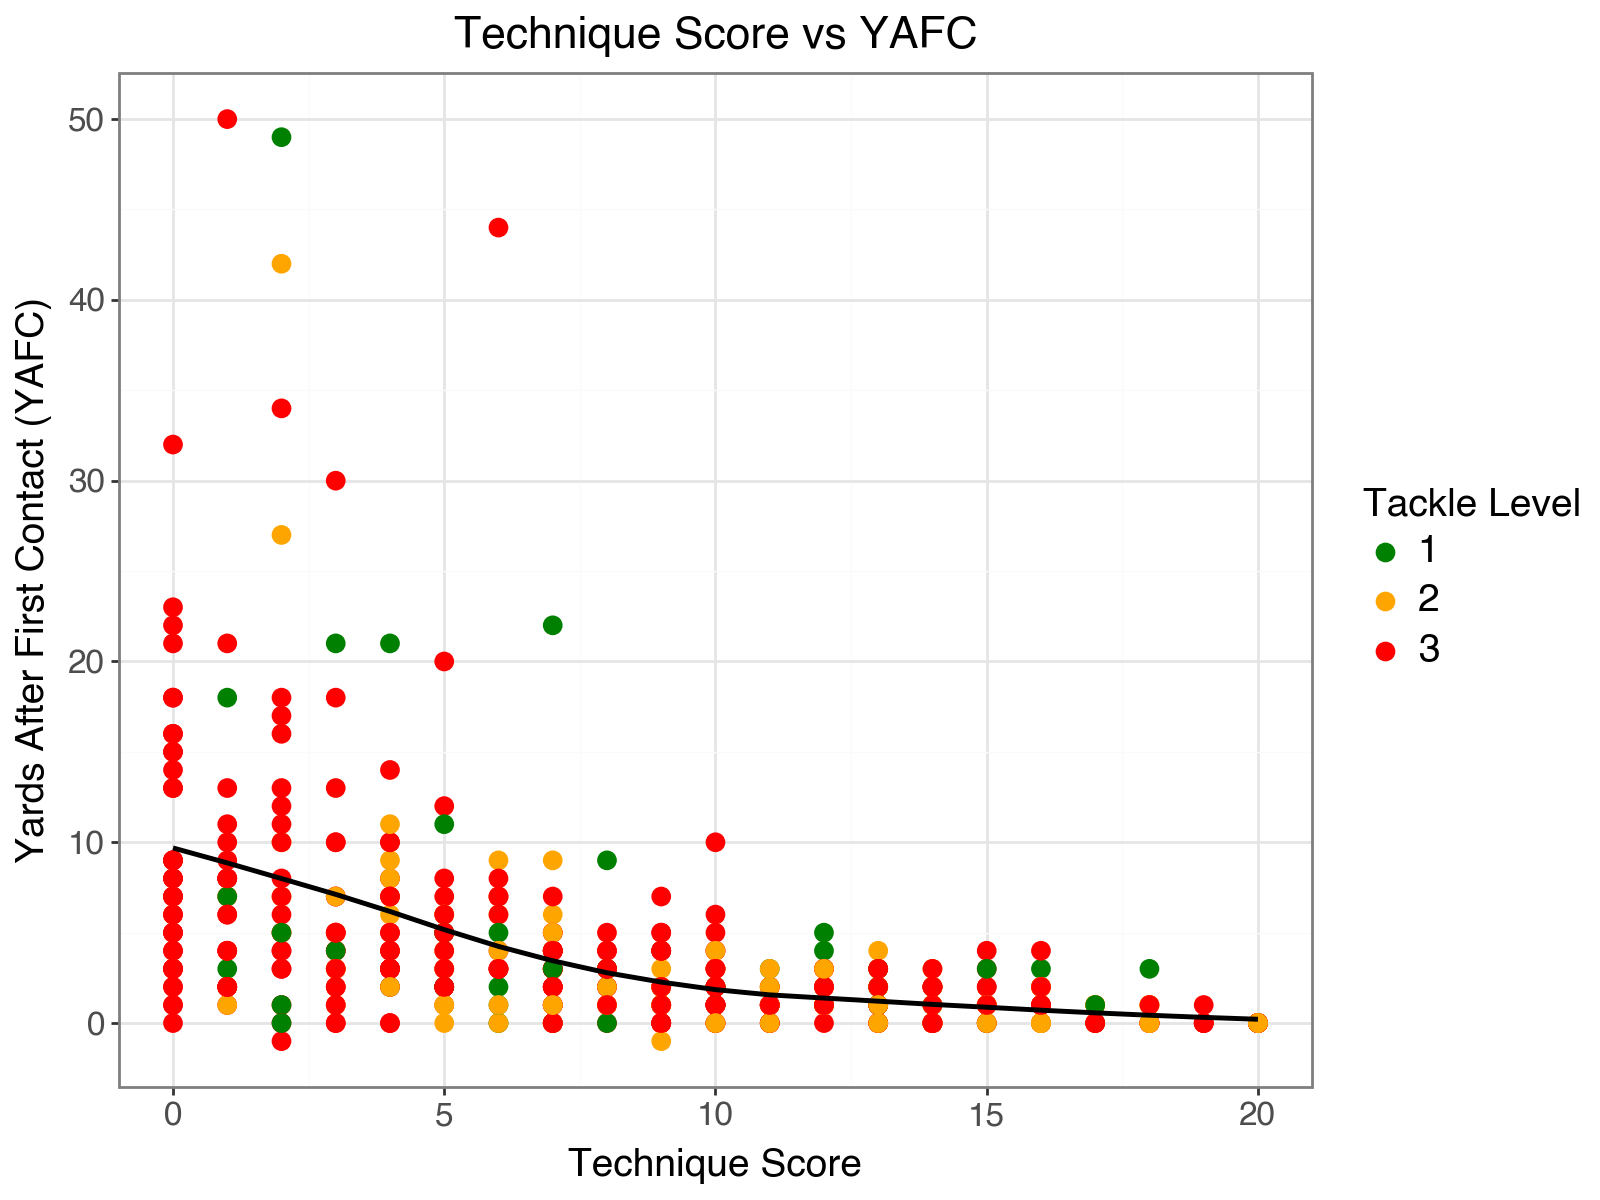

In [173]:
from plotnine import ggplot, aes, geom_point, geom_smooth, scale_color_manual, labs, theme_bw, theme, element_text
vibrant_colors = ['green', 'orange', "red"]
(
    ggplot(tackle, aes(x="TECH_SCORE", y="YAFC"))
    + geom_point(aes(color="factor(LEVEL)"), size=3)  # color only applies to points
    + geom_smooth(method="loess", se=False, color="black")  # single trend line
    + scale_color_manual(values= vibrant_colors, name="Tackle Level")
    + labs(
        title="Technique Score vs YAFC",
        x="Technique Score",
        y="Yards After First Contact (YAFC)"
    )
    + theme_bw()
    + theme(
        figure_size=(8,6),
        text=element_text(size=14),
        axis_title=element_text(size=14),
        axis_text=element_text(size=12),
        plot_title=element_text(size=16, weight="bold", ha="center")
    )
)

In [219]:

from numpy.polynomial.polynomial import Polynomial
# Fit a 2nd-degree polynomial to approximate the LOESS curve
poly = Polynomial.fit(tackle["TECH_SCORE"], tackle["YAFC"], deg=2)
coeffs = poly.convert().coef

print(f"Approx equation: YAFC = {coeffs[0]:.3f} + {coeffs[1]:.3f}*TECH_SCORE + {coeffs[2]:.3f}*TECH_SCORE²")


Approx equation: YAFC = 9.893 + -1.096*TECH_SCORE + 0.032*TECH_SCORE²


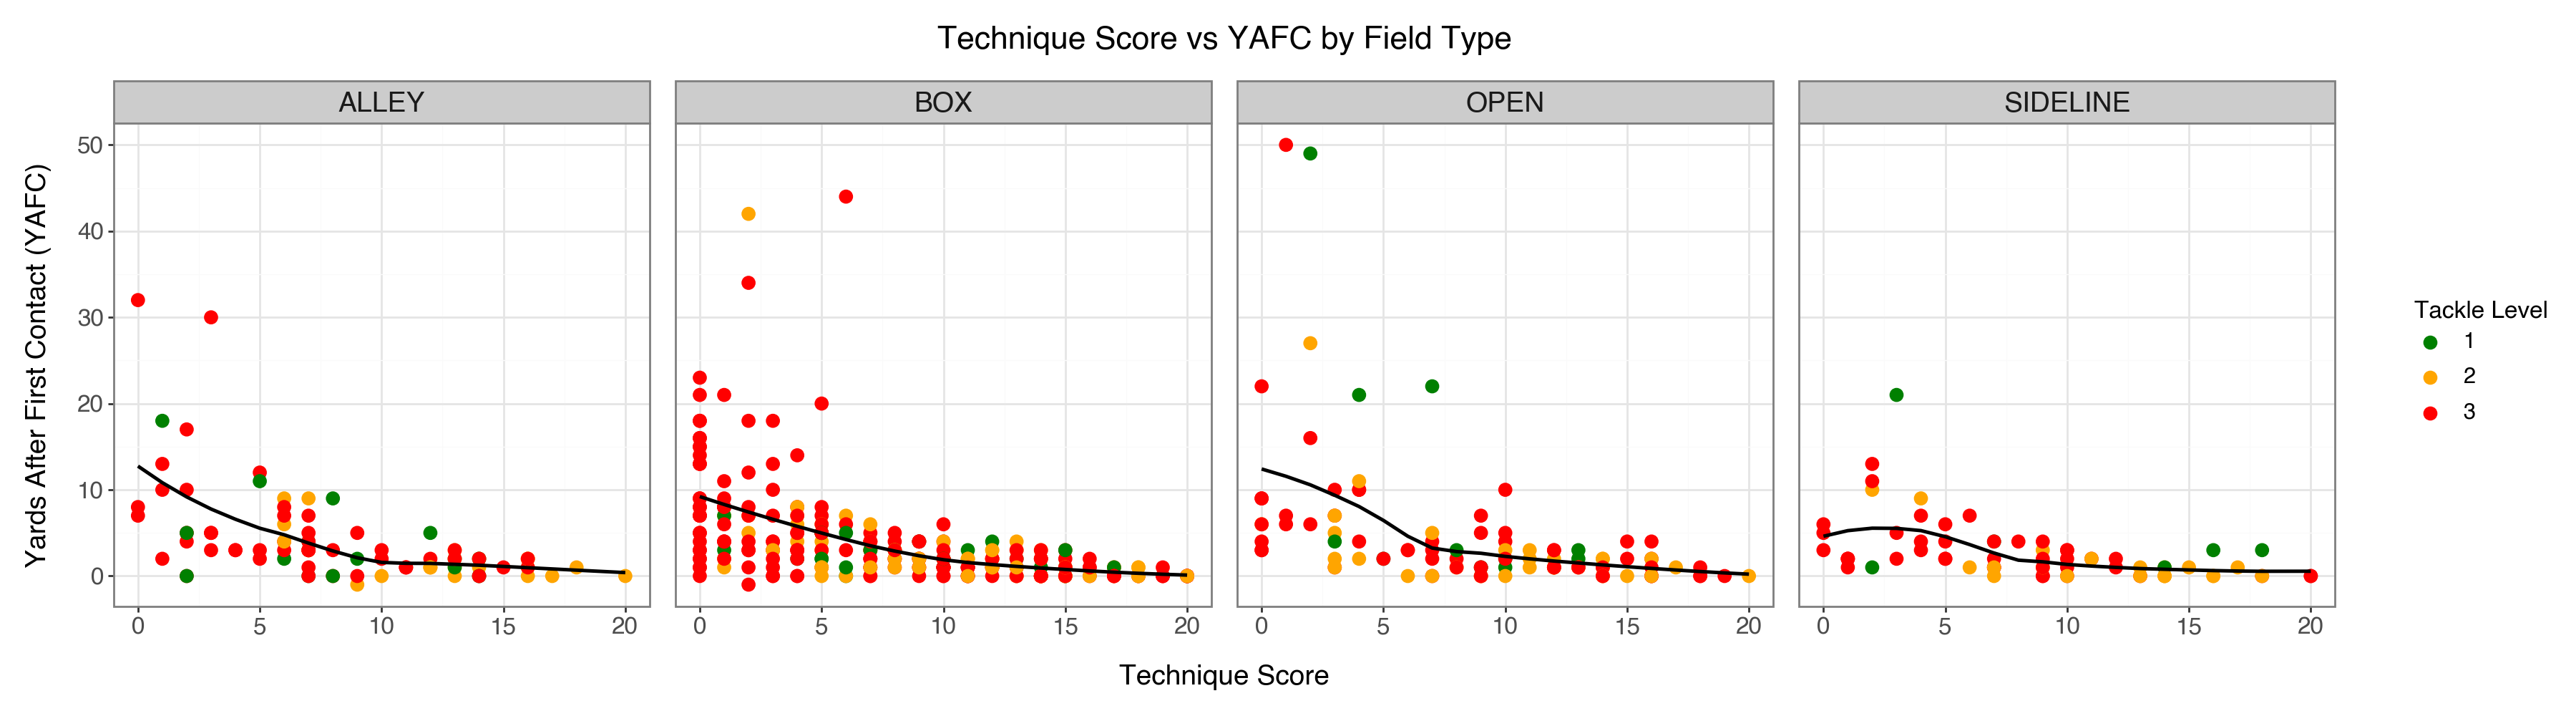

In [158]:
from plotnine import (
    ggplot, aes, geom_point, geom_smooth, scale_color_manual, labs,
    theme_bw, theme, element_text, facet_wrap
)

vibrant_colors = ['green', 'orange', 'red']  # Level 1,2,3 if present

(
    ggplot(tackle_clean, aes(x="TECH_SCORE", y="YAFC"))
    + geom_point(aes(color="factor(LEVEL)"), size=3)
    + geom_smooth(method="loess", se=False, color="black")
    + scale_color_manual(values=vibrant_colors, name="Tackle Level")
    + facet_wrap("~FIELD_TYPE", nrow=1)   # 4 side by side panels (one per field type)
    + labs(
        title="Technique Score vs YAFC by Field Type",
        x="Technique Score",
        y="Yards After First Contact (YAFC)"
    )
    + theme_bw()
    + theme(
        figure_size=(18, 5),  # wide so 4 plots fit
        text=element_text(size=14),
        axis_title=element_text(size=14),
        axis_text=element_text(size=12),
        plot_title=element_text(size=16, weight="bold", ha="center"),
        legend_title=element_text(size=12),
        legend_text=element_text(size=11)
    )
)


In [233]:
from numpy.polynomial.polynomial import Polynomial

for ft, sub in tackle.dropna(subset=["FIELD_TYPE","TECH_SCORE","YAFC"]).groupby("FIELD_TYPE"):
    a0, a1, a2 = Polynomial.fit(sub["TECH_SCORE"], sub["YAFC"], 2).convert().coef
    print(f"{ft}: YAFC = {a0:.3f} + ({a1:.3f}*TECH_SCORE) + {a2:.3f}*TECH_SCORE²")


ALLEY: YAFC = 11.969 + (-1.526*TECH_SCORE) + 0.053*TECH_SCORE²
BOX: YAFC = 9.225 + (-0.995*TECH_SCORE) + 0.028*TECH_SCORE²
OPEN: YAFC = 13.061 + (-1.533*TECH_SCORE) + 0.047*TECH_SCORE²
SIDELINE: YAFC = 6.417 + (-0.591*TECH_SCORE) + 0.014*TECH_SCORE²


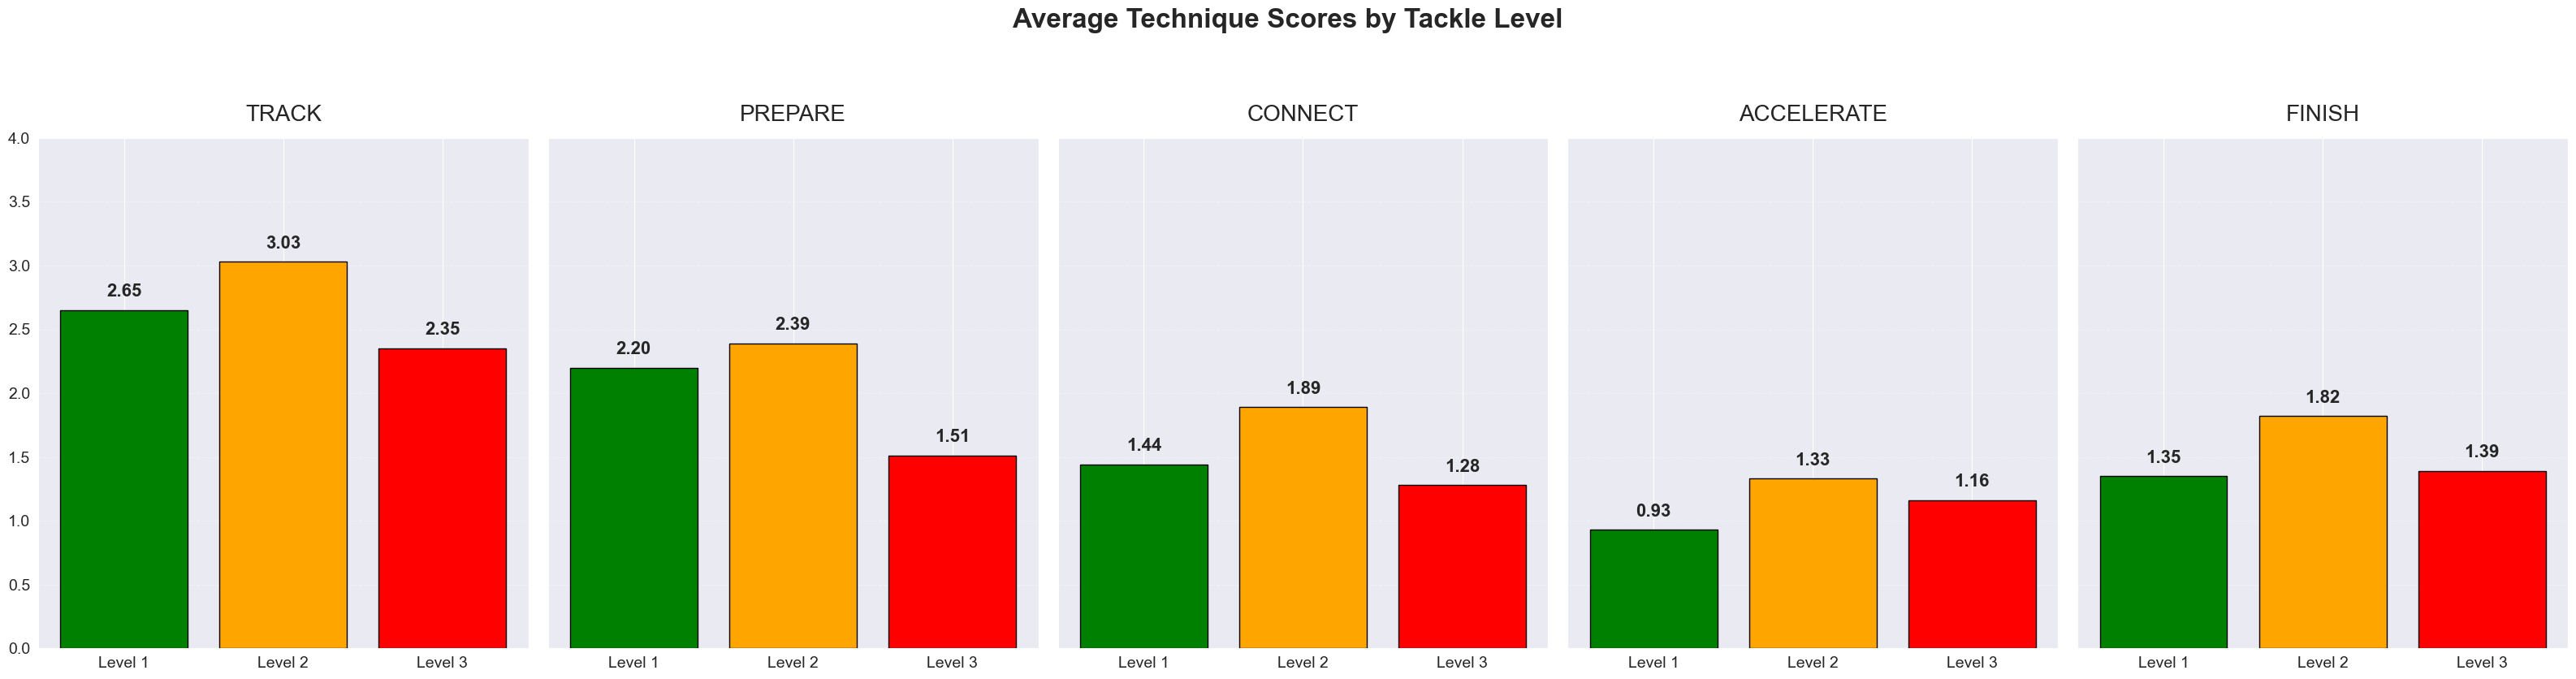

In [160]:
tackle.groupby("LEVEL")["MAKE/MISS"].value_counts(normalize=True)

float(tackle['YAFC'].mean())
float(tackle.loc[tackle['WEEK'].isin(['1', '2', '3', '4', '5', '6']), 'YAFC'].sum())

tackle.groupby("LEVEL")["YAFC"].agg(["count", "mean"])

tackle.groupby(["LEVEL", "MAKE/MISS"])["YAFC"].mean()

yafc_q95 = tackle["YAFC"].quantile(0.90)
(
    tackle.assign(BIG_YAFC=tackle["YAFC"] >= yafc_q95)
    .groupby("LEVEL")["BIG_YAFC"].mean()
    .rename("Big_YAFC_Rate")
)
import matplotlib.pyplot as plt

tech_cols = ["TRACK", "PREPARE", "CONNECT", "ACCELERATE", "FINISH"]

tech_by_level = (
    tackle.groupby("LEVEL")[tech_cols]
    .mean()
    .reindex([1, 2, 3])
    .round(2)
)

# --- GLOBAL FONT SCALING ---
plt.rcParams.update({
    'font.size': 16,  # Base font size
    'axes.titlesize': 18,  # Subplot titles
    'axes.labelsize': 16,  # Axis labels
    'xtick.labelsize': 14,  # X-tick labels
    'ytick.labelsize': 14,  # Y-tick labels
    'legend.fontsize': 14
})

# --- FIGURE SETUP ---
fig, axes = plt.subplots(1, 5, figsize=(32, 8), sharey=True)
colors = ["green", "orange", "red"]

for i, col in enumerate(tech_cols):
    ax = axes[i]
    ax.bar(tech_by_level.index, tech_by_level[col], color=colors, edgecolor="black")
    ax.set_title(col, fontsize=20, pad=15)
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(["Level 1", "Level 2", "Level 3"])
    ax.set_ylim(0, 4)
    ax.grid(axis="y", linestyle="--", alpha=0.3)

    # Add value labels (larger + offset)
    for x, y in zip(tech_by_level.index, tech_by_level[col]):
        ax.text(x, y + 0.08, f"{y:.2f}",
                ha="center", va="bottom",
                fontsize=16, fontweight="bold")

fig.suptitle("Average Technique Scores by Tackle Level", fontsize=24, weight="bold", y=1.05)
plt.tight_layout()
plt.show()


YAFC_gt3    0    1
LEVEL             
1          38   17
2         117   28
3         216  126
Chi-square = 14.504, p = 0.0007
Level 2 proportion (YAFC>3) = 0.1931 (28/145)
Level 3 proportion (YAFC>3) = 0.3684 (126/342)
Proportion Difference = -0.1753
95% CI for difference = [-0.2574, -0.0932]


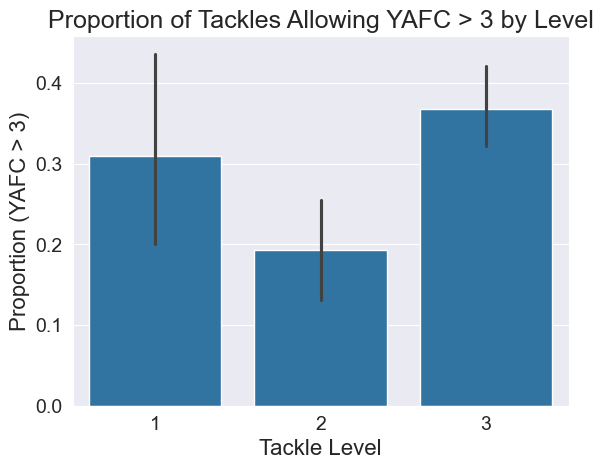

In [247]:
import pandas as pd
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import confint_proportions_2indep
import seaborn as sns


# Create YAFC_gt3 (drop missing YAFC so NaNs don't get treated as 0)
tackle = tackle.dropna(subset=["YAFC"]).copy()
tackle["YAFC_gt3"] = (tackle["YAFC"] > 3).astype(int)

# Chi-square test across all levels
tab = pd.crosstab(tackle["LEVEL"], tackle["YAFC_gt3"])
chi2, p, dof, expected = chi2_contingency(tab)

print(tab)
print(f"Chi-square = {chi2:.3f}, p = {p:.4f}")

# 95% CI for difference in proportions: Level 2 vs Level 3
lvl2 = tackle[tackle["LEVEL"] == 2]
lvl3 = tackle[tackle["LEVEL"] == 3]

x2 = int(lvl2["YAFC_gt3"].sum())
n2 = int(len(lvl2))
x3 = int(lvl3["YAFC_gt3"].sum())
n3 = int(len(lvl3))

p2 = x2 / n2
p3 = x3 / n3

ci_low, ci_high = confint_proportions_2indep(
    count1=x2, nobs1=n2,
    count2=x3, nobs2=n3,
    compare="diff",
    alpha=0.05,
    method="wald"
)

print(f"Level 2 proportion (YAFC>3) = {p2:.4f} ({x2}/{n2})")
print(f"Level 3 proportion (YAFC>3) = {p3:.4f} ({x3}/{n3})")
print(f"Proportion Difference = {(p2 - p3):.4f}")
print(f"95% CI for difference = [{float(ci_low):.4f}, {float(ci_high):.4f}]")
sns.barplot(data=tackle, x="LEVEL", y="YAFC_gt3")
plt.title("Proportion of Tackles Allowing YAFC > 3 by Level")
plt.ylabel("Proportion (YAFC > 3)")
plt.xlabel("Tackle Level")
plt.show()


In [246]:
from statsmodels.stats.proportion import proportions_ztest, confint_proportions_2indep
import pandas as pd

# Counts
made_lvl2 = ((tackle["LEVEL"] == 2) & (tackle["MAKE/MISS"].astype(str).str.upper() == "MAKE")).sum()
made_lvl3 = ((tackle["LEVEL"] == 3) & (tackle["MAKE/MISS"].astype(str).str.upper() == "MAKE")).sum()
total_lvl2 = (tackle["LEVEL"] == 2).sum()
total_lvl3 = (tackle["LEVEL"] == 3).sum()

# Test
z_stat, p_val = proportions_ztest([made_lvl2, made_lvl3], [total_lvl2, total_lvl3])

# 95% CI for difference in proportions (Level 2 minus Level 3)
ci_low, ci_high = confint_proportions_2indep(
    count1=made_lvl2, nobs1=total_lvl2,
    count2=made_lvl3, nobs2=total_lvl3,
    compare="diff",
    alpha=0.05,
    method="wald"
)

p2 = made_lvl2 / total_lvl2
p3 = made_lvl3 / total_lvl3

table = pd.DataFrame({
    "Level": ["Level 2", "Level 3"],
    "Made Tackles": [int(made_lvl2), int(made_lvl3)],
    "Total Tackles": [int(total_lvl2), int(total_lvl3)],
    "Make %": [round(p2, 4), round(p3, 4)]
})

print(table)
print(f"Proportion Difference = {(p2 - p3):.4f}")
print(f"95% CI = [{float(ci_low):.4f}, {float(ci_high):.4f}]")
print(f"Z-stat = {float(z_stat):.4f}")
print(f"P-value = {float(p_val):.6g}")


     Level  Made Tackles  Total Tackles  Make %
0  Level 2           104            145  0.7172
1  Level 3           196            342  0.5731
Proportion Difference = 0.1441
95% CI = [0.0540, 0.2343]
Z-stat = 2.9907
P-value = 0.00278353


In [245]:
# Significant difference in YAFC allowed (made tackles only): Level 2 vs Level 3
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

made = tackle[tackle["MAKE/MISS"].astype(str).str.upper() == "MAKE"].copy()
made["YAFC"] = pd.to_numeric(made["YAFC"], errors="coerce")

lvl2_yafc = made.loc[made["LEVEL"] == 2, "YAFC"].dropna()
lvl3_yafc = made.loc[made["LEVEL"] == 3, "YAFC"].dropna()

# Welch t-test
t_stat, p_val = ttest_ind(lvl2_yafc, lvl3_yafc, equal_var=False)

# 95% CI for difference in means (Welch) using statsmodels
cm = CompareMeans(DescrStatsW(lvl2_yafc), DescrStatsW(lvl3_yafc))
ci_low, ci_high = cm.tconfint_diff(usevar="unequal", alpha=0.05)

m2 = float(lvl2_yafc.mean())
m3 = float(lvl3_yafc.mean())
diff = m2 - m3

print(f"Level 2 made tackles: n = {len(lvl2_yafc)}, mean YAFC = {m2:.3f}")
print(f"Level 3 made tackles: n = {len(lvl3_yafc)}, mean YAFC = {m3:.3f}")
print(f"Mean difference (L2 minus L3) = {diff:.3f}")
print(f"95% CI for mean difference = [{float(ci_low):.3f}, {float(ci_high):.3f}]")
print(f"Welch t-test: t = {float(t_stat):.3f}, p-value = {float(p_val):.6g}")


Level 2 made tackles: n = 104, mean YAFC = 1.221
Level 3 made tackles: n = 196, mean YAFC = 1.673
Mean difference (L2 minus L3) = -0.452
95% CI for mean difference = [-0.787, -0.118]
Welch t-test: t = -2.664, p-value = 0.00816969


In [244]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

tech_cols = ["TRACK", "PREPARE", "CONNECT", "ACCELERATE", "FINISH"]
tackle["TECH_SCORE"] = tackle[tech_cols].sum(axis=1)

lvl2 = tackle.loc[tackle["LEVEL"] == 2, "TECH_SCORE"].dropna()
lvl3 = tackle.loc[tackle["LEVEL"] == 3, "TECH_SCORE"].dropna()

t_stat, p_val = ttest_ind(lvl2, lvl3, equal_var=False)

cm = CompareMeans(DescrStatsW(lvl2), DescrStatsW(lvl3))
ci_low, ci_high = cm.tconfint_diff(usevar="unequal", alpha=0.05)

print(f"Level 2 mean TECH_SCORE = {float(lvl2.mean()):.3f} (n={len(lvl2)})")
print(f"Level 3 mean TECH_SCORE = {float(lvl3.mean()):.3f} (n={len(lvl3)})")
print(f"Mean difference (L2 minus L3) = {float(lvl2.mean() - lvl3.mean()):.3f}")
print(f"95% CI for mean difference = [{float(ci_low):.3f}, {float(ci_high):.3f}]")
print(f"Welch t-test: t = {float(t_stat):.3f}, p-value = {float(p_val):.6g}")


Level 2 mean TECH_SCORE = 10.469 (n=145)
Level 3 mean TECH_SCORE = 7.699 (n=342)
Mean difference (L2 minus L3) = 2.770
95% CI for mean difference = [1.759, 3.781]
Welch t-test: t = 5.392, p-value = 1.38511e-07


In [248]:
from statsmodels.stats.proportion import proportions_ztest, confint_proportions_2indep
import pandas as pd

# ---------- ENGAGED ONLY ----------
made_lvl2 = ((tackle_clean["ENGAGED"] == 1) & (tackle_clean["LEVEL"] == 2) & (tackle_clean["MAKE/MISS"].astype(str).str.upper() == "MAKE")).sum()
made_lvl3 = ((tackle_clean["ENGAGED"] == 1) & (tackle_clean["LEVEL"] == 3) & (tackle_clean["MAKE/MISS"].astype(str).str.upper() == "MAKE")).sum()

total_lvl2 = ((tackle_clean["ENGAGED"] == 1) & (tackle_clean["LEVEL"] == 2)).sum()
total_lvl3 = ((tackle_clean["ENGAGED"] == 1) & (tackle_clean["LEVEL"] == 3)).sum()

z_stat, p_val = proportions_ztest([made_lvl2, made_lvl3], [total_lvl2, total_lvl3])

ci_low, ci_high = confint_proportions_2indep(
    count1=made_lvl2, nobs1=total_lvl2,
    count2=made_lvl3, nobs2=total_lvl3,
    compare="diff", alpha=0.05, method="wald"
)

p2 = made_lvl2 / total_lvl2 if total_lvl2 else None
p3 = made_lvl3 / total_lvl3 if total_lvl3 else None
diff = (p2 - p3) if (p2 is not None and p3 is not None) else None

table_engaged = pd.DataFrame({
    "Group": ["Engaged Level 2", "Engaged Level 3"],
    "Made Tackles": [int(made_lvl2), int(made_lvl3)],
    "Total Tackles": [int(total_lvl2), int(total_lvl3)],
    "Make %": [round(p2, 4) if p2 is not None else None,
               round(p3, 4) if p3 is not None else None]
})

print("Two-proportion z-test: MAKE% (Engaged only)")
print(table_engaged)
print(f"Difference (L2 minus L3) = {float(diff):.4f}")
print(f"95% CI for difference = [{float(ci_low):.4f}, {float(ci_high):.4f}]")
print(f"Z-stat = {float(z_stat):.4f}")
print(f"P-value = {float(p_val):.6g}")


Two-proportion z-test: MAKE% (Engaged only)
             Group  Made Tackles  Total Tackles  Make %
0  Engaged Level 2            15             28  0.5357
1  Engaged Level 3            58            115  0.5043
Difference (L2 minus L3) = 0.0314
95% CI for difference = [-0.1747, 0.2375]
Z-stat = 0.2977
P-value = 0.765894


In [252]:
from statsmodels.stats.proportion import proportions_ztest, confint_proportions_2indep
import pandas as pd

# ---------- NOT ENGAGED ONLY ----------
made_lvl2 = ((tackle_clean["ENGAGED"] == 0) & (tackle_clean["LEVEL"] == 2) & (tackle_clean["MAKE/MISS"].astype(str).str.upper() == "MAKE")).sum()
made_lvl3 = ((tackle_clean["ENGAGED"] == 0) & (tackle_clean["LEVEL"] == 3) & (tackle_clean["MAKE/MISS"].astype(str).str.upper() == "MAKE")).sum()

total_lvl2 = ((tackle_clean["ENGAGED"] == 0) & (tackle_clean["LEVEL"] == 2)).sum()
total_lvl3 = ((tackle_clean["ENGAGED"] == 0) & (tackle_clean["LEVEL"] == 3)).sum()

z_stat, p_val = proportions_ztest([made_lvl2, made_lvl3], [total_lvl2, total_lvl3])

ci_low, ci_high = confint_proportions_2indep(
    count1=made_lvl2, nobs1=total_lvl2,
    count2=made_lvl3, nobs2=total_lvl3,
    compare="diff", alpha=0.05, method="wald"
)

p2 = made_lvl2 / total_lvl2 if total_lvl2 else None
p3 = made_lvl3 / total_lvl3 if total_lvl3 else None
diff = (p2 - p3) if (p2 is not None and p3 is not None) else None

table_not_engaged = pd.DataFrame({
    "Group": ["Not Engaged Level 2", "Not Engaged Level 3"],
    "Made Tackles": [int(made_lvl2), int(made_lvl3)],
    "Total Tackles": [int(total_lvl2), int(total_lvl3)],
    "Make %": [round(p2, 4) if p2 is not None else None,
               round(p3, 4) if p3 is not None else None]
})

print("Two-proportion z-test: MAKE% (Not engaged only)")
print(table_not_engaged)
print(f"Difference (L2 minus L3) = {float(diff):.4f}")
print(f"95% CI for difference = [{float(ci_low):.4f}, {float(ci_high):.4f}]")
print(f"Z-stat = {float(z_stat):.4f}")
print(f"P-value = {float(p_val):.6g}")


Two-proportion z-test: MAKE% (Not engaged only)
                 Group  Made Tackles  Total Tackles  Make %
0  Not Engaged Level 2            89            117  0.7607
1  Not Engaged Level 3           138            227  0.6079
Difference (L2 minus L3) = 0.1528
95% CI for difference = [0.0527, 0.2528]
Z-stat = 2.8332
P-value = 0.0046089


In [182]:
import statsmodels.formula.api as smf
tackle_clean["IS_MAKE"] = tackle_clean["MAKE/MISS"].astype(str).str.upper().eq("MAKE").astype(int)
tackle_clean["ENGAGED"] = tackle_clean["ENGAGED"].astype(str).str.upper().map({
    "1": 1, "0": 0,
    "TRUE": 1, "FALSE": 0,
    "YES": 1, "NO": 0,
    "Y": 1, "N": 0
}).fillna(pd.to_numeric(tackle_clean["ENGAGED"], errors="coerce"))
# Logistic regression for ENGAGED tackles only (Level 2 vs Level 3)

tackle_engaged = tackle_clean.loc[
    (tackle_clean["LEVEL"].isin([2, 3])) &
    (tackle_clean["ENGAGED"] == 1)
].dropna(subset=["IS_MAKE", "LEVEL", "TECH_SCORE"])

model_engaged = smf.logit("IS_MAKE ~ C(LEVEL) + TECH_SCORE", data=tackle_engaged).fit(disp=False)

print("ENGAGED ONLY")
print(f"n = {len(tackle_engaged)}")
print(f"Coefficient for Level 3 vs Level 2 = {model_engaged.params['C(LEVEL)[T.3]']:.4f}")
print(f"P-value (Level effect) = {model_engaged.pvalues['C(LEVEL)[T.3]']:.6g}")

tech_mean = float(tackle_engaged["TECH_SCORE"].mean())

pred_rows = pd.DataFrame({
    "LEVEL": [2, 3],
    "TECH_SCORE": [tech_mean, tech_mean]
})
pred_probs = model_engaged.predict(pred_rows)

print(f"Predicted P(MAKE) at mean TECH_SCORE ({tech_mean:.2f})")
print(f"Level 2 = {float(pred_probs.iloc[0]):.4f}")
print(f"Level 3 = {float(pred_probs.iloc[1]):.4f}")


ENGAGED ONLY
n = 143
Coefficient for Level 3 vs Level 2 = 2.9170
P-value (Level effect) = 0.056982
Predicted P(MAKE) at mean TECH_SCORE (6.82)
Level 2 = 0.4085
Level 3 = 0.9274


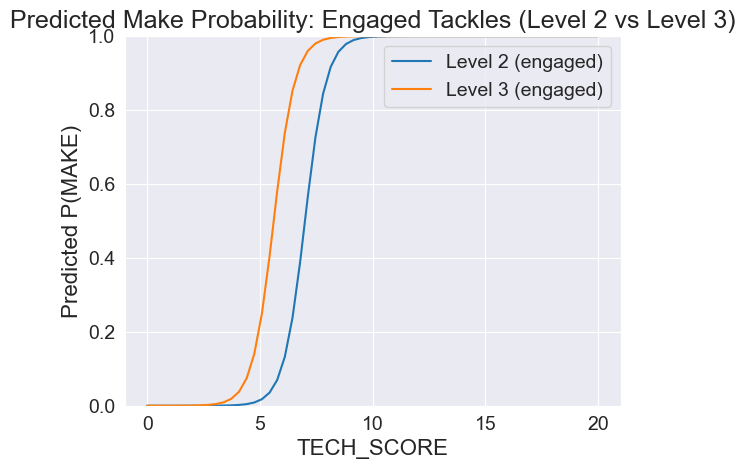

In [183]:
# Plot for ENGAGED tackles (Level 2 vs Level 3)

tech_min = float(tackle_engaged["TECH_SCORE"].min())
tech_max = float(tackle_engaged["TECH_SCORE"].max())
tech_grid = np.linspace(tech_min, tech_max, 60)

plot_data = pd.DataFrame({
    "LEVEL": np.repeat([2, 3], len(tech_grid)),
    "TECH_SCORE": np.tile(tech_grid, 2)
})
plot_data["P_MAKE"] = model_engaged.predict(plot_data)

plt.figure()
plt.plot(plot_data.loc[plot_data["LEVEL"] == 2, "TECH_SCORE"],
         plot_data.loc[plot_data["LEVEL"] == 2, "P_MAKE"],
         label="Level 2 (engaged)")
plt.plot(plot_data.loc[plot_data["LEVEL"] == 3, "TECH_SCORE"],
         plot_data.loc[plot_data["LEVEL"] == 3, "P_MAKE"],
         label="Level 3 (engaged)")

plt.xlabel("TECH_SCORE")
plt.ylabel("Predicted P(MAKE)")
plt.title("Predicted Make Probability: Engaged Tackles (Level 2 vs Level 3)")
plt.ylim(0, 1)
plt.legend()
plt.show()


In [167]:
# Logistic regression for NOT ENGAGED tackles only (Level 2 vs Level 3)

tackle_not_engaged = tackle_clean.loc[
    (tackle_clean["LEVEL"].isin([2, 3])) &
    (tackle_clean["ENGAGED"] == 0)
].dropna(subset=["IS_MAKE", "LEVEL", "TECH_SCORE"])

model_not_engaged = smf.logit("IS_MAKE ~ C(LEVEL) + TECH_SCORE", data=tackle_not_engaged).fit(disp=False)

print("NOT ENGAGED ONLY")
print(f"n = {len(tackle_not_engaged)}")
print(f"Coefficient for Level 3 vs Level 2 = {model_not_engaged.params['C(LEVEL)[T.3]']:.4f}")
print(f"P-value (Level effect) = {model_not_engaged.pvalues['C(LEVEL)[T.3]']:.6g}")

tech_mean = float(tackle_not_engaged["TECH_SCORE"].mean())

pred_rows = pd.DataFrame({
    "LEVEL": [2, 3],
    "TECH_SCORE": [tech_mean, tech_mean]
})
pred_probs = model_not_engaged.predict(pred_rows)

print(f"Predicted P(MAKE) at mean TECH_SCORE ({tech_mean:.2f})")
print(f"Level 2 = {float(pred_probs.iloc[0]):.4f}")
print(f"Level 3 = {float(pred_probs.iloc[1]):.4f}")


NOT ENGAGED ONLY
n = 344
Coefficient for Level 3 vs Level 2 = 0.6795
P-value (Level effect) = 0.151857
Predicted P(MAKE) at mean TECH_SCORE (9.23)
Level 2 = 0.8764
Level 3 = 0.9333


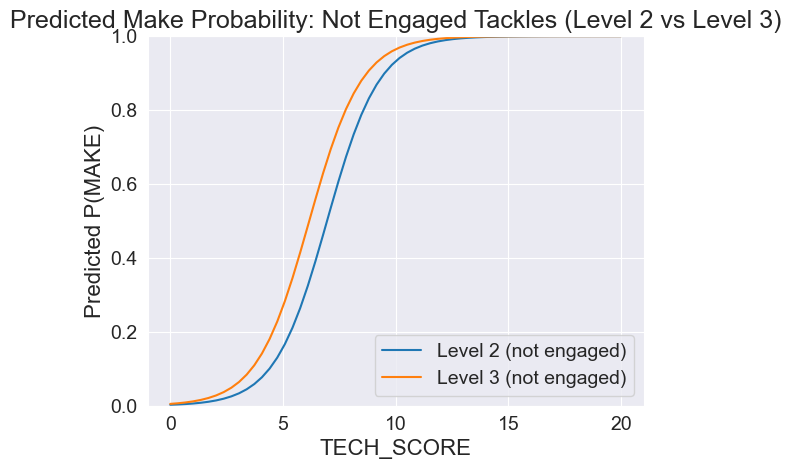

In [168]:
# Plot for NOT ENGAGED tackles (Level 2 vs Level 3)

tech_min = float(tackle_not_engaged["TECH_SCORE"].min())
tech_max = float(tackle_not_engaged["TECH_SCORE"].max())
tech_grid = np.linspace(tech_min, tech_max, 60)

plot_data = pd.DataFrame({
    "LEVEL": np.repeat([2, 3], len(tech_grid)),
    "TECH_SCORE": np.tile(tech_grid, 2)
})
plot_data["P_MAKE"] = model_not_engaged.predict(plot_data)

plt.figure()
plt.plot(plot_data.loc[plot_data["LEVEL"] == 2, "TECH_SCORE"],
         plot_data.loc[plot_data["LEVEL"] == 2, "P_MAKE"],
         label="Level 2 (not engaged)")
plt.plot(plot_data.loc[plot_data["LEVEL"] == 3, "TECH_SCORE"],
         plot_data.loc[plot_data["LEVEL"] == 3, "P_MAKE"],
         label="Level 3 (not engaged)")

plt.xlabel("TECH_SCORE")
plt.ylabel("Predicted P(MAKE)")
plt.title("Predicted Make Probability: Not Engaged Tackles (Level 2 vs Level 3)")
plt.ylim(0, 1)
plt.legend()
plt.show()


In [169]:
#plan is not to use binomial (beta binomial?) model in paper rihgt now, focus on for ext semester when creating tackle predictor. Make a pargraph on why talk about not seeing the right probability nad the train data was off (mean tech score)